In [15]:
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
import matplotlib as mpl

In [16]:

data = pd.read_csv("Data.1 Sales Record.csv")
category_sales = data.groupby("大类名称")["销售金额"].sum()


In [17]:
data.head()

,顾客编号,大类编码,大类名称,中类编码,中类名称,小类编码,小类名称,销售日期,销售月份,商品编码,规格型号,商品类型,单位,销售数量,商品单价,销售金额,是否促销
0,0,12,蔬果,1201,蔬菜,120109,其它蔬菜,20150101,201501,DW-1201090311,,生鲜,个,8.0,2.0,16.0,否
1,1,20,粮油,2014,酱菜类,201401,榨菜,20150101,201501,DW-2014010019,60g,一般商品,袋,6.0,0.5,3.0,否
2,2,15,日配,1505,冷藏乳品,150502,冷藏加味酸乳,20150101,201501,DW-1505020011,150g,一般商品,袋,1.0,2.4,2.4,否
3,3,15,日配,1503,冷藏料理,150305,冷藏面食类,20150101,201501,DW-1503050035,500g,一般商品,袋,1.0,8.3,8.3,否
4,4,15,日配,1505,冷藏乳品,150502,冷藏加味酸乳,20150101,201501,DW-1505020020,100g*8,一般商品,袋,1.0,11.9,11.9,否


In [18]:
category_sales

大类名称
休闲    80688.35660
冲调    15141.80000
家居     6628.70000
家电      882.00000
文体     2091.10000
日配    92921.60248
水产     2891.00782
洗化    42708.40000
烘焙      110.90600
熟食     5939.93040
粮油    65380.74764
肉禽    25197.75280
蔬果    82885.15488
酒饮    57336.70000
针织     6695.80000
Name: 销售金额, dtype: float64

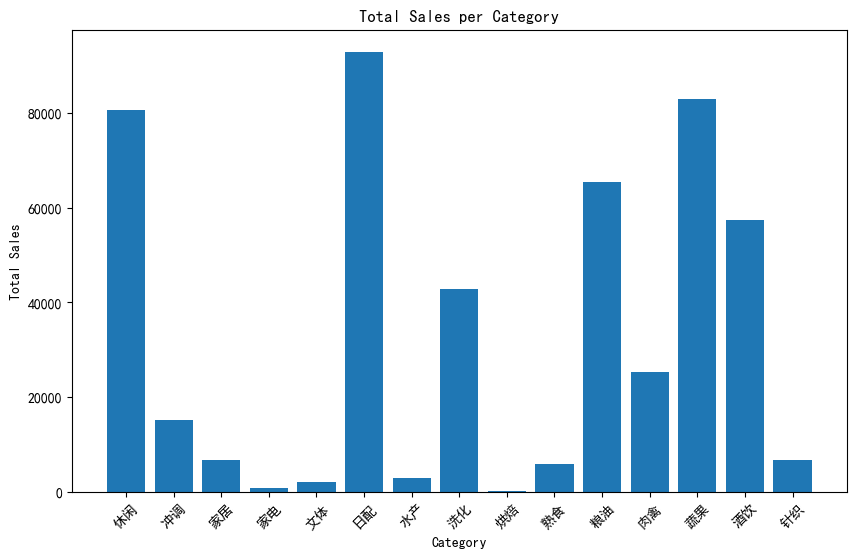

In [19]:
mpl.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体来显示中文
mpl.rcParams['axes.unicode_minus'] = False  # 解决坐标轴负号显示问题

plt.figure(figsize=(10,6))
plt.bar(category_sales.index, category_sales.values)
plt.title('Total Sales per Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

In [24]:
data["销售日期"] = pd.to_datetime(data["销售日期"],format="%Y%m%d",errors='coerce') 

In [21]:
date = pd.to_datetime(data["销售日期"], format="%Y%m%d", errors='coerce')

In [25]:
data.head()

,顾客编号,大类编码,大类名称,中类编码,中类名称,小类编码,小类名称,销售日期,销售月份,商品编码,规格型号,商品类型,单位,销售数量,商品单价,销售金额,是否促销
0,0,12,蔬果,1201,蔬菜,120109,其它蔬菜,2015-01-01,201501,DW-1201090311,,生鲜,个,8.0,2.0,16.0,否
1,1,20,粮油,2014,酱菜类,201401,榨菜,2015-01-01,201501,DW-2014010019,60g,一般商品,袋,6.0,0.5,3.0,否
2,2,15,日配,1505,冷藏乳品,150502,冷藏加味酸乳,2015-01-01,201501,DW-1505020011,150g,一般商品,袋,1.0,2.4,2.4,否
3,3,15,日配,1503,冷藏料理,150305,冷藏面食类,2015-01-01,201501,DW-1503050035,500g,一般商品,袋,1.0,8.3,8.3,否
4,4,15,日配,1505,冷藏乳品,150502,冷藏加味酸乳,2015-01-01,201501,DW-1505020020,100g*8,一般商品,袋,1.0,11.9,11.9,否


In [32]:
mothly_sales = data.resample('ME', on="销售日期")['销售金额'].sum()

In [31]:
mothly_sales

销售日期
2015-01-01    125138.72408
2015-02-01    150550.85582
2015-03-01    100460.87294
2015-04-01    111334.50578
Name: 销售金额, dtype: float64

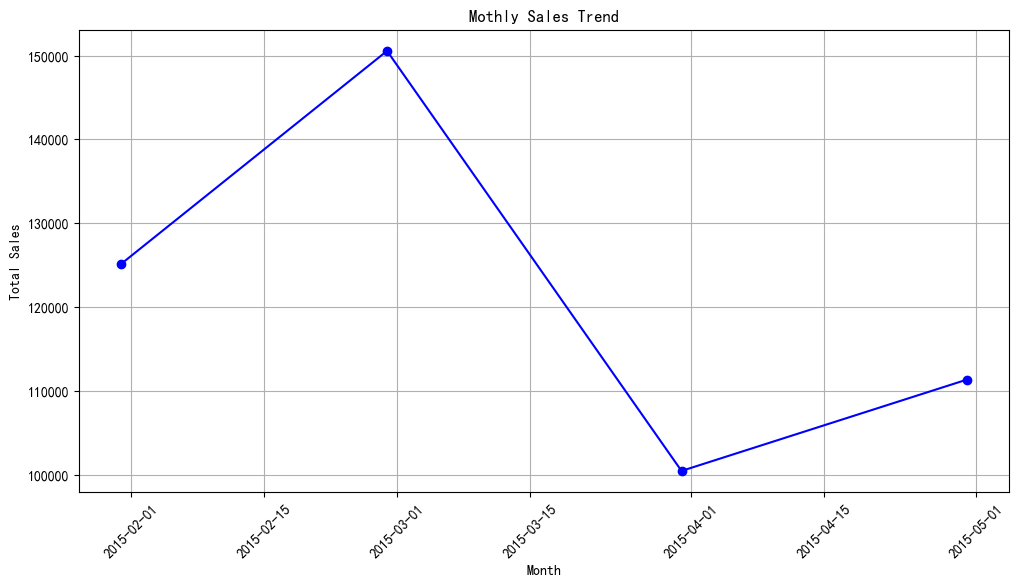

In [42]:
plt.figure(figsize=(12,6))
plt.plot(mothly_sales.index, mothly_sales.values, marker="o", color="b")
plt.title("Mothly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [54]:
data["是否促销"] = data["是否促销"].map({"是": 1, "否": 0}).fillna(0).astype(int)

In [55]:
data.head()

,顾客编号,大类编码,大类名称,中类编码,中类名称,小类编码,小类名称,销售日期,销售月份,商品编码,规格型号,商品类型,单位,销售数量,商品单价,销售金额,是否促销
0,0,12,蔬果,1201,蔬菜,120109,其它蔬菜,2015-01-01,201501,DW-1201090311,,生鲜,个,8.0,2.0,16.0,0
1,1,20,粮油,2014,酱菜类,201401,榨菜,2015-01-01,201501,DW-2014010019,60g,一般商品,袋,6.0,0.5,3.0,0
2,2,15,日配,1505,冷藏乳品,150502,冷藏加味酸乳,2015-01-01,201501,DW-1505020011,150g,一般商品,袋,1.0,2.4,2.4,0
3,3,15,日配,1503,冷藏料理,150305,冷藏面食类,2015-01-01,201501,DW-1503050035,500g,一般商品,袋,1.0,8.3,8.3,0
4,4,15,日配,1505,冷藏乳品,150502,冷藏加味酸乳,2015-01-01,201501,DW-1505020020,100g*8,一般商品,袋,1.0,11.9,11.9,0


In [57]:
promo_effect = data.pivot_table(values="销售金额", index="大类名称", columns="是否促销",aggfunc="mean")

In [58]:
promo_effect

是否促销,0
大类名称,
休闲,9.118359
冲调,25.534233
家居,11.216074
家电,17.640000
文体,7.831835
日配,19.439666
水产,14.825681
洗化,13.920600
烘焙,6.161444


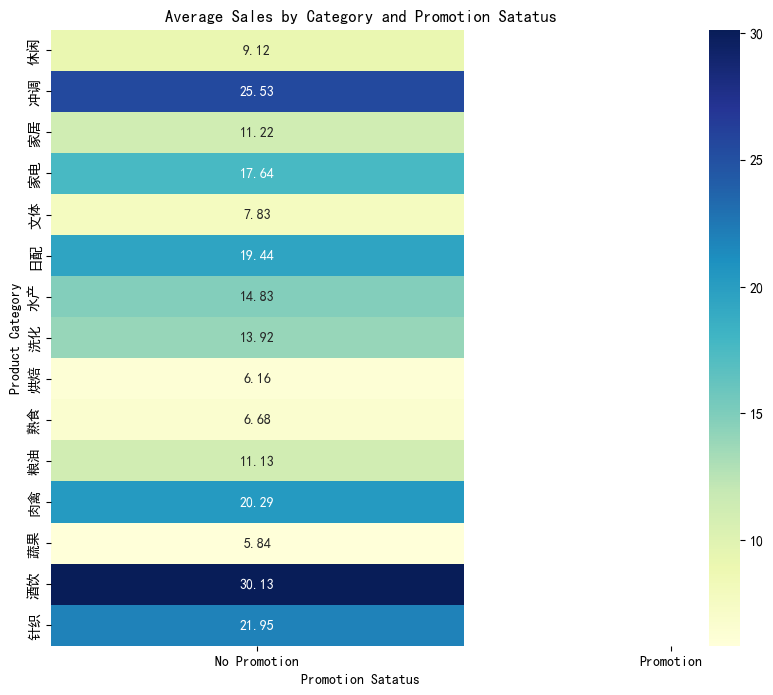

In [59]:
plt.figure(figsize=(10,8))
sns.heatmap(promo_effect, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Average Sales by Category and Promotion Satatus")
plt.xlabel("Promotion Satatus")
plt.ylabel("Product Category")
plt.xticks([0.5,1.5],["No Promotion", "Promotion"])
plt.show()

In [60]:
promo_sales = data[data["是否促销"] == 1 ]["销售金额"].sum()

In [61]:
non_promo_sales = data[data["是否促销"] == 0 ]["销售金额"].sum()

In [62]:
promo_sales

np.float64(0.0)

In [63]:
non_promo_sales

np.float64(487499.95862)

In [65]:
labels = ["Promotion","No Promotion"]
sales_data = [promo_sales, non_promo_sales]
colors = ["#ff9999", "#66b3ff"]

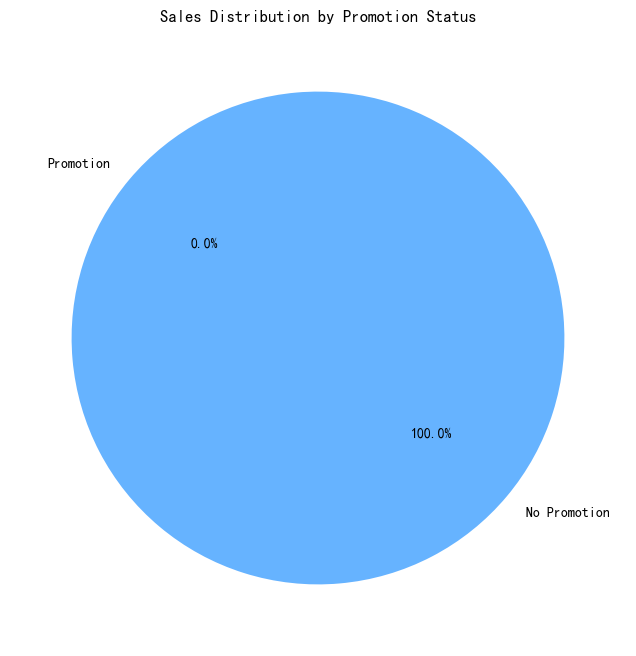

In [67]:
plt.figure(figsize=(8,8))
plt.pie(sales_data,labels=labels ,autopct="%1.1f%%", startangle=140, colors=colors)
plt.title("Sales Distribution by Promotion Status")
plt.show()